In [1]:
# Set directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-default-dataset/Loan_Default.csv


In [2]:
# Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Importing and visualizing the data

In [3]:
df = pd.read_csv('/kaggle/input/loan-default-dataset/Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
# Verifying the types
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [5]:
df['Security_Type'].value_counts()

Security_Type
direct      148637
Indriect        33
Name: count, dtype: int64

To categorical:
- loan_limit, Gender, loan_type, loan_purpose, Credit_Worthiness, open_credit, business_or_commercial, Neg_ammortization, interest_only, lump_sum_payment, construction_type, occupancy_type, Secured_by, total_units, credit_type, co-applicant_credit_type, age, submission_of_application, region, Security_Type

Could be dummies:
- Neg_ammortization, loan_limit, Credit_Worthiness, open_credit, business_or_commercial, interest_only, lump_sum_payment, submission_of_application, Security_Type

In [6]:
# Credit worthiness could be an objective variable
df['Credit_Worthiness'].value_counts()

Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


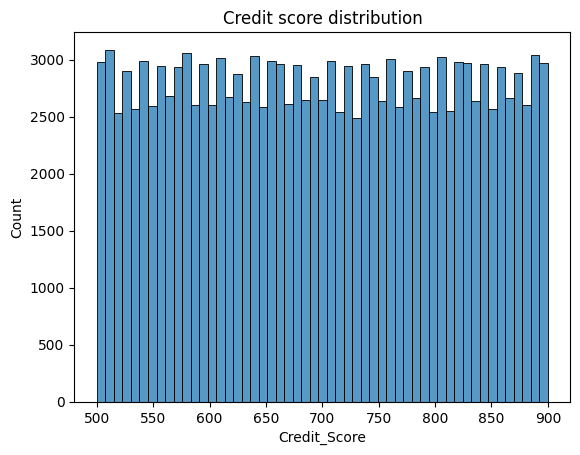

In [7]:
sns.histplot(df, x='Credit_Score')
plt.title('Credit score distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


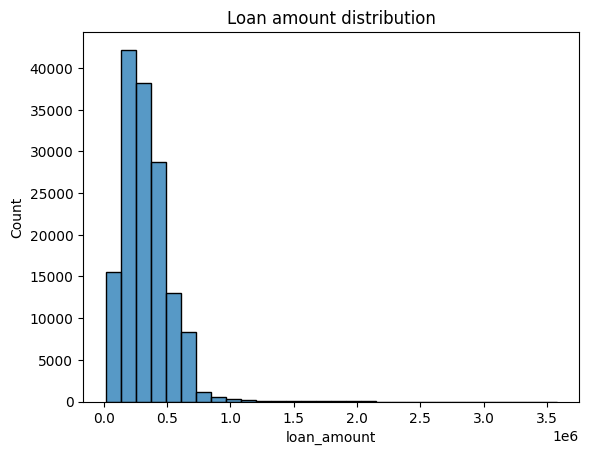

In [8]:
sns.histplot(df, x='loan_amount', bins=30)
plt.title('Loan amount distribution')
plt.show()

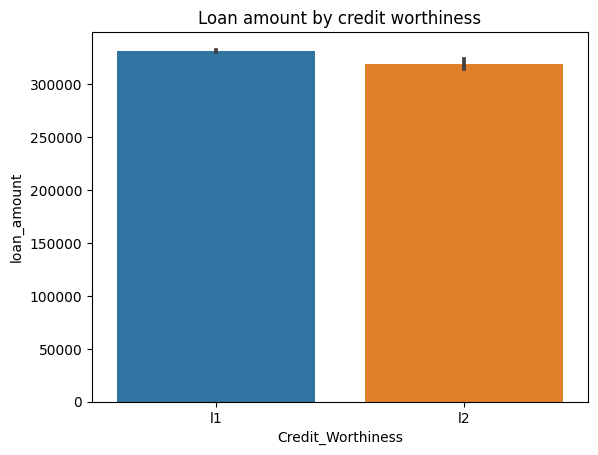

In [9]:
# Visualizing relations between this and other variables
sns.barplot(data=df, y='loan_amount', x='Credit_Worthiness')
plt.title('Loan amount by credit worthiness')
plt.show()

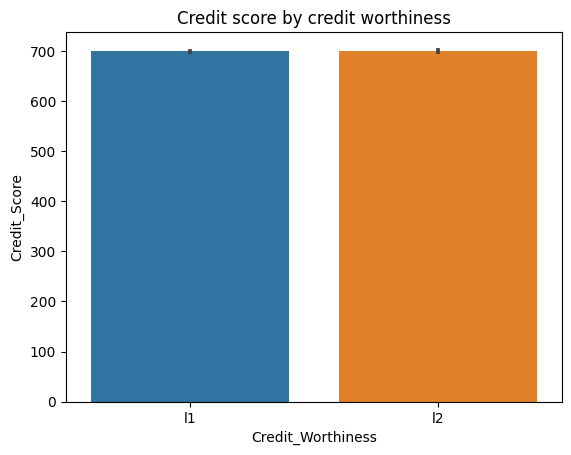

In [10]:
sns.barplot(data=df, y='Credit_Score', x='Credit_Worthiness')
plt.title('Credit score by credit worthiness')
plt.show()

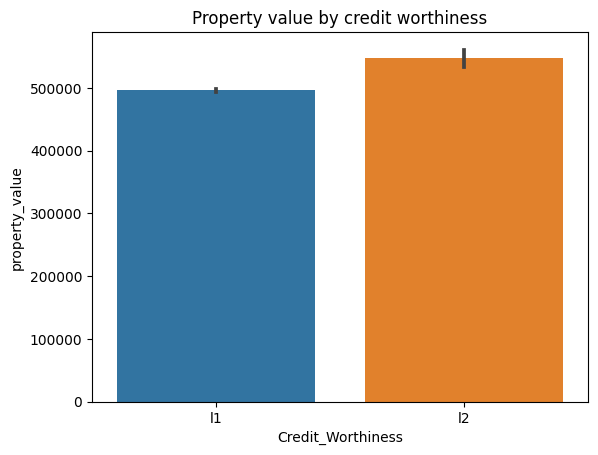

In [11]:
sns.barplot(data=df, x='Credit_Worthiness', y='property_value')
plt.title('Property value by credit worthiness')
plt.show()

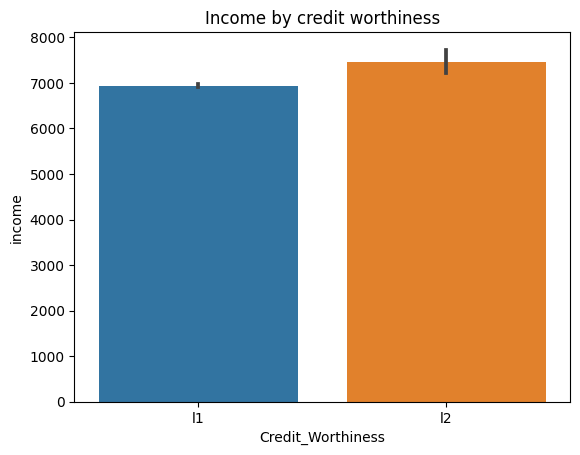

In [12]:
sns.barplot(data=df, x='Credit_Worthiness', y='income')
plt.title('Income by credit worthiness')
plt.show()

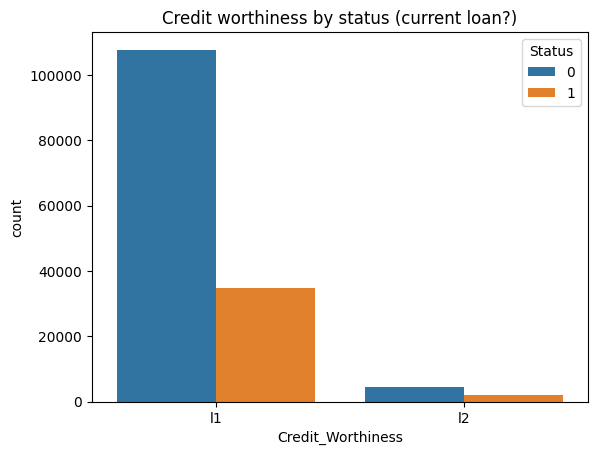

In [13]:
sns.countplot(data=df, x='Credit_Worthiness', hue='Status')
plt.title('Credit worthiness by status (current loan?)')
plt.show()

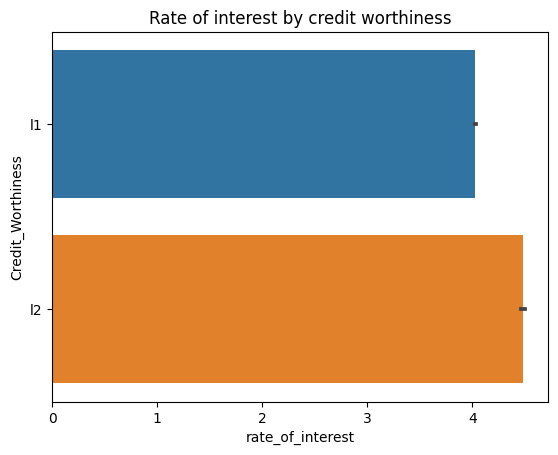

In [14]:
sns.barplot(df, y='Credit_Worthiness', x='rate_of_interest')
plt.title('Rate of interest by credit worthiness')
plt.show()

Credit_Worthiness = l1 groups people with more credit worthiness than l2.

# 2. Data cleaning

In [15]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [16]:
df['loan_limit'].value_counts()

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64

In [17]:
# Keep only the necessary columns
df = df.drop(['ID','year','co-applicant_credit_type'],axis=1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

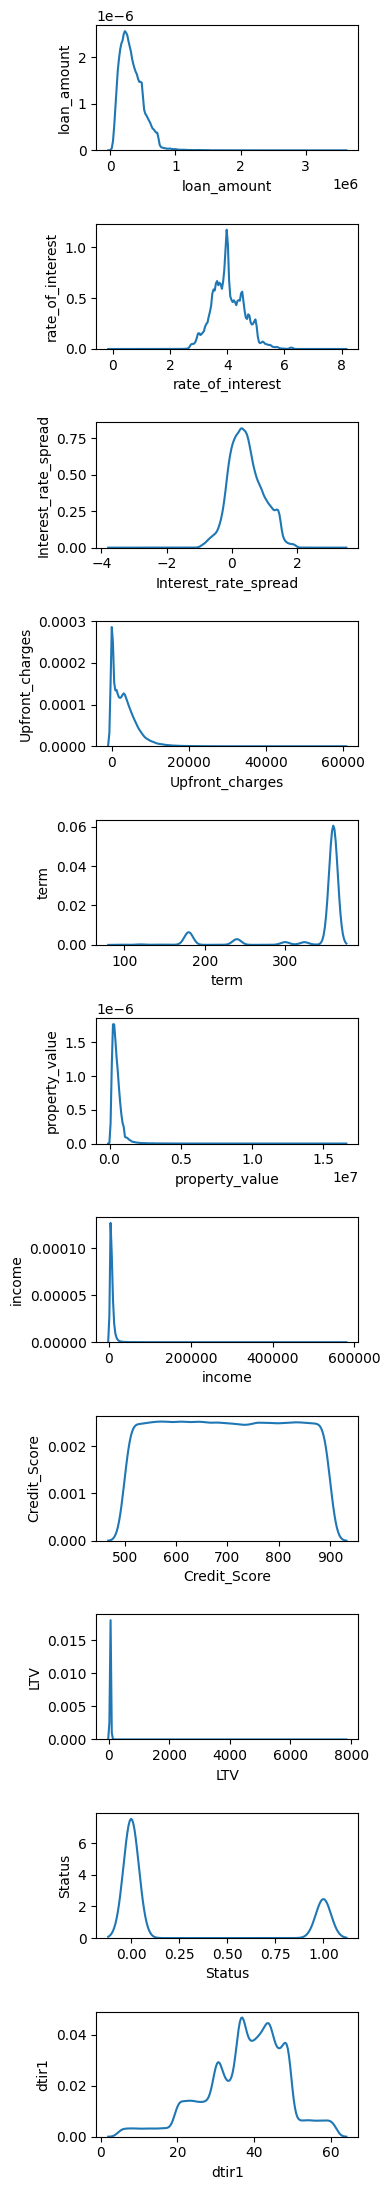

In [18]:
# finding outliers
numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
fig, axes = plt.subplots(ncols=1,nrows=len(numeric_columns),figsize=(4,2*len(numeric_columns)))
for i, var in enumerate(numeric_columns):
    sns.kdeplot(data=df, x=var, ax=axes[i])
    axes[i].set(ylabel=var)
plt.tight_layout()
plt.show()

In [19]:
def cut_outliers(df,cols,alpha):
    """Drops the observations above and below an alpha threshold (in percentage).
        - cols (list): list of strings with the names of the columns with outliers.
        - alpha (int): quantile threshold.
    """
    df_len_start = len(df)
    for col in cols:
        upper_limit = df[col].quantile((100-alpha/2)/100)
        lower_limit = df[col].quantile((alpha/2)/100)
        df = df[(df[col]<upper_limit) & (df[col]>lower_limit)]
    df_len_end = len(df)
    print('Cutting finished. {} observations cutted. Now there are {} obs.'.format(df_len_start-df_len_end,df_len_end))
    return df

In [20]:
df = cut_outliers(df,['loan_amount','Upfront_charges','term','property_value','income'],alpha=2)

Cutting finished. 133468 observations cutted. Now there are 15202 obs.


# 3. Preprocessing

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15202 entries, 20 to 148669
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_limit                 14924 non-null  object 
 1   Gender                     15202 non-null  object 
 2   approv_in_adv              15103 non-null  object 
 3   loan_type                  15202 non-null  object 
 4   loan_purpose               15200 non-null  object 
 5   Credit_Worthiness          15202 non-null  object 
 6   open_credit                15202 non-null  object 
 7   business_or_commercial     15202 non-null  object 
 8   loan_amount                15202 non-null  int64  
 9   rate_of_interest           15202 non-null  float64
 10  Interest_rate_spread       15202 non-null  float64
 11  Upfront_charges            15202 non-null  float64
 12  term                       15202 non-null  float64
 13  Neg_ammortization          15196 non-null  object

In [22]:
df['Security_Type'].value_counts()

Security_Type
direct    15202
Name: count, dtype: int64

In [23]:
# Creating dummies
df['Credit_Worthiness'] = np.where(df['Credit_Worthiness']=='l1',1,0)
df['approv_in_adv'] = np.where(df['approv_in_adv']=='pre',1,0)
df.drop(['open_credit','total_units','Security_Type','construction_type'], axis=1, inplace=True)
df['Neg_ammortization'] = np.where(df['Neg_ammortization']=='neg_amm',1,0)
df['interest_only'] = np.where(df['interest_only']=='int_only',1,0)
df['lump_sum_payment'] = np.where(df['lump_sum_payment']=='lpsm',1,0)

Categorícas: Gender, loan_limit,  loan_type, loan_purpose, business_or_commercial, construction_type, occupancy_type, credit_type, submission_of_application, Region, 

In [24]:
df = pd.get_dummies(data=df, 
                    columns=['Gender','loan_limit','loan_type','loan_purpose',
                             'business_or_commercial','occupancy_type',
                             'credit_type','submission_of_application','Region',
                             'Secured_by','age'],
                    drop_first=True,
                    dtype=int)

In [25]:
print(df.dtypes)
print(len(df.dtypes))

approv_in_adv                          int64
Credit_Worthiness                      int64
loan_amount                            int64
rate_of_interest                     float64
Interest_rate_spread                 float64
Upfront_charges                      float64
term                                 float64
Neg_ammortization                      int64
interest_only                          int64
lump_sum_payment                       int64
property_value                       float64
income                               float64
Credit_Score                           int64
LTV                                  float64
Status                                 int64
dtir1                                float64
Gender_Joint                           int64
Gender_Male                            int64
Gender_Sex Not Available               int64
loan_limit_ncf                         int64
loan_type_type2                        int64
loan_type_type3                        int64
loan_purpo

In [26]:
df['Credit_Worthiness'].value_counts()

Credit_Worthiness
1    14744
0      458
Name: count, dtype: int64

# 4. Models

Since we have a variable called Credit_worthiness, this is a supervised learning problem. We need to classify the observations into two groups: default and non default. We are using Credit_worthiness as a proxy. If a client is credit worthiness, we assume they won't default.

In [27]:
# Spliting data
X = df.drop(['Credit_Worthiness'],axis=1)
y = df['Credit_Worthiness']

In [28]:
# We need to solve the imbalance problem on the y variable. To do so we're using SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=12).fit_resample(X,y)

In [29]:
y_resampled.value_counts()

Credit_Worthiness
1    14744
0    14744
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=12)

### 4.1. Logistic Regression

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
# Run a LogisticRegression
logreg = LogisticRegression(random_state=12)
# Fit the model
logreg.fit(X_train, y_train)
# Predict labels
y_pred = logreg.predict(X_test)
# Compute accuracy
logreg_accuracy = logreg.score(X_test,y_test)
print('Logistic Regression accuracy: {}'.format(logreg_accuracy))

Logistic Regression accuracy: 0.559963829546739


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Feature importances
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
transformed = pca.transform(X_train)
print(transformed.shape)

(20641, 39)


### 4.2. Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
GBC = GradientBoostingClassifier(random_state=12)
# Fit the model
GBC.fit(X_train, y_train)
# Predict labels
y_pred_gbc = GBC.predict(X_test)
# Compute accuracy
GBC_accuracy = GBC.score(X_test,y_test)
print('Gradient Boosting accuracy: {}'.format(GBC_accuracy))

Gradient Boosting accuracy: 0.9578388154176557


In [36]:
GBC.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 12,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [37]:
# Hyperparameter tuning, just in case
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'max_depth':np.arange(5,10,1),
              'max_features':np.arange(5,35,5),
              'min_samples_leaf':np.arange(0.1,1,0.1),
              'n_estimators':np.arange(50,200,50)}
GBC_cv = RandomizedSearchCV(GBC, param_grid, cv=5, n_iter=100)
# Fit the model
GBC_cv.fit(X_train, y_train)
# Predict
print('Best parameters: \n',GBC_cv.best_params_)
print('Best score: \n',GBC_cv.best_score_)

Best parameters: 
 {'n_estimators': 150, 'min_samples_leaf': 0.1, 'max_features': 20, 'max_depth': 9}
Best score: 
 0.9411367130956872


In [38]:
best_model = GBC_cv.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print('Test accuracy of the best model: {}'.format(test_accuracy))

Test accuracy of the best model: 0.9404317847858031


In [39]:
feature_importance = pd.DataFrame(data=GBC.feature_importances_,index=X_train.columns.tolist())
feature_importance = feature_importance.sort_values(by=0,ascending=False)
feature_importance.head(10)

,0
rate_of_interest,0.147909
loan_purpose_p3,0.123254
term,0.120301
loan_purpose_p4,0.109946
approv_in_adv,0.061896
age_45-54,0.049926
credit_type_CRIF,0.044816
age_55-64,0.044773
Gender_Joint,0.043892
credit_type_EXP,0.041592


# Conclusions

We've trained two models. LogisticRegression has an accuracy score of 0.55996, which is just slightly better than randomly choosing a label for y. On the other hand, we've trained a GradientBoostingClassifier model with an accuracy score of 0.94404 on the test set, with the following parameters: {'n_estimators': 150, 'min_samples_leaf': 0.1, 'max_features': 30, 'max_depth': 8}.

The most important feature to predict if a client is worth of credit is the rate of interest.